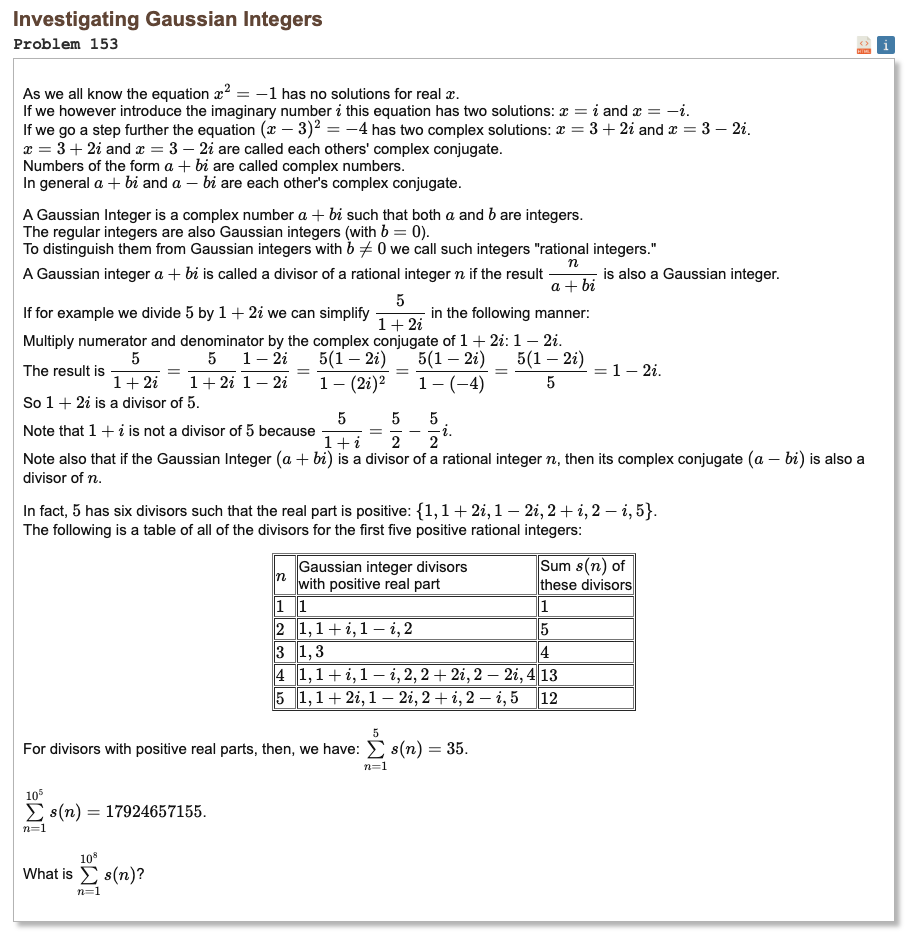

## Initial approach

* goal is sum over n≤N of all gaussian integer divisors with positive real part where N is the given limit
* split contributions into real divisors and genuinely complex conjugate pairs
* real divisors just sum to σ(n) so total over n≤N equals sum_{d≤N} d·⌊N/d⌋ using the divisor summatory trick
* a complex divisor a+bi divides a rational integer n iff a²+b² divides n
* we count both a+bi and a−bi so contribution is 2a per multiple
* count only primitive pairs with a>0 b>0 and gcd(a,b)=1 and add 2a·⌊N/(a²+b²)⌋ for each
* iterate a up to ⌊√N⌋ and b up to min(a−1, ⌊√(N−a²)⌋) to avoid double counting
* use gcd to enforce primitiveness and fast grouping for the σ-sum in O(√N)
* no external libraries are needed besides math.gcd and math.isqrt

In [1]:
from math import gcd, isqrt

def sum_sigma_upto(N):
    res = 0
    i = 1
    while i <= N:
        q = N // i
        j = N // q
        res += q * ((i + j) * (j - i + 1) // 2)
        i = j + 1
    return res

def complex_contrib(N):
    total = 0
    max_a = isqrt(N)
    for a in range(1, max_a + 1):
        rem = N - a * a
        if rem < 1:
            continue
        bmax = min(a - 1, isqrt(rem))
        for b in range(1, bmax + 1):
            if gcd(a, b) != 1:
                continue
            s = a * a + b * b
            total += 2 * a * (N // s)
    return total

def solve(N=10**8):
    return sum_sigma_upto(N) + complex_contrib(N)

In [2]:
%%time
result = solve()
print("Result:", result)

Result: 8225418926793915
CPU times: user 4.17 s, sys: 18.3 ms, total: 4.19 s
Wall time: 4.2 s
